### 데이터 불러오기 + Resize하기

#### 라이브러리를 불러온다.

In [17]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


#### 이미지를 불러와서 28x28 사이즈로 변경한다.

In [18]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images to be resized.")
    
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽음
image_dir_path=os.getenv("HOME")+"/Documents/Aiffel/Exploration/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽음
image_dir_path=os.getenv("HOME")+"/Documents/Aiffel/Exploration/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽음
image_dir_path=os.getenv("HOME")+"/Documents/Aiffel/Exploration/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


#### load_data()라는 함수를 통해 데이터를 읽는다.

In [19]:
import numpy as np

# 가위바위보 이미지 개수 총합
def load_data(img_path, number_of_data=300):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/Documents/Aiffel/Exploration/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
# 입력은 0~1 사이의 값으로 정규화
x_train_norm = x_train/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


#### 이미지 부르기

라벨:  0


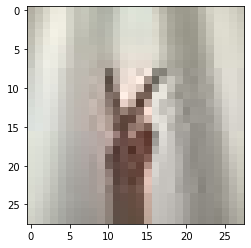

In [20]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 딥러닝 네트워크 설계하기

In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers)) 

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_7 (Dense)              (

### 딥러닝 네트워크 학습시키기

In [23]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

# 데이터갯수에 -1을 쓰면 reshape시 자동계산
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Before Reshape - x_train_norm shape: (300, 28, 28, 3)
Before Reshape - x_test_norm shape: (12, 28, 28, 3)
After Reshape - x_train_reshaped shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (36, 28, 28, 1)
Epoch 1/10
10/10 [==============================] - 0s 10ms/step - loss: 1.0907 - accuracy: 0.3233
Epoch 2/10
 1/10 [==>...........................] - ETA: 0s - loss: 1.0243 - accuracy: 0.4375

2021-09-30 09:56:58.877666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 8ms/step - loss: 1.0568 - accuracy: 0.3733
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.9516 - accuracy: 0.7033
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.8113 - accuracy: 0.9567
Epoch 5/10
10/10 [==============================] - 0s 7ms/step - loss: 0.6350 - accuracy: 0.8900
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.4064 - accuracy: 0.9933
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2378 - accuracy: 0.9900
Epoch 8/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1479 - accuracy: 0.9900
Epoch 9/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0899 - accuracy: 0.9933
Epoch 10/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0608 - accuracy: 1.0000


### 테스트 데이터 만들기

In [22]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽음
image_dir_path = os.getenv("HOME") + "/Documents/Aiffel/Exploration/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽음
image_dir_path = os.getenv("HOME") + "/Documents/Aiffel/Exploration/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽음
image_dir_path = os.getenv("HOME") + "/Documents/Aiffel/Exploration/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

# x_test, y_test 만들기
import numpy as np

# 가위바위보 이미지 개수 총합
def load_data(img_path, number_of_data=12):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/Documents/Aiffel/Exploration/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

4  images to be resized.
4  images resized.
가위 이미지 resize 완료!
4  images to be resized.
4  images resized.
바위 이미지 resize 완료!
4  images to be resized.
4  images resized.
보 이미지 resize 완료!
학습데이터(x_test)의 이미지 개수는 12 입니다.
x_test shape: (12, 28, 28, 3)
y_test shape: (12,)


### model을 사용하여 accuracy 측정하기

In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

1/1 - 0s - loss: 332.9459 - accuracy: 0.5000
test_loss: 332.94586181640625 
test_accuracy: 0.5


2021-09-30 09:57:13.607184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
